# <span style="color:royalblue"> [1주차] 데이터 분석 시작하기</span> <img src="./data/logo.png" style="width: 120px;" align="right">
# 주택 매매가격 지수 데이터 분석 

--- 

<div style="text-align: right"> Final Edition : 2024.07.12<br>
    copyrightⓒ 2022 All rights reserved by Data Lover Pablo </div>

# 1. Jupyter Notebook 설치점검 및 살펴보기

- [x] 간단한 메뉴 및 기능 소개  
- [x] extension 설치  
- [x] 단축키 : 상단에 키보드 모양 눌러보기  
- [ ] 자주 쓰는 단축키 :     
  * <span style="color:red"> shift + enter(실행)</span>, 
  * esc(입력상태), 
  * a(above 위에 셀 삽입),
  * b(below 아래 셀 삽입), 
  * dd(삭제), 
  * shift 누른상태에서 방향키(선택), 
  * m(마크다운으로 변경), 
  * y(코드로 변경), 
  * shift + m(셀 합치기)
 
<span style="color:darkgray"> ※ 단축키는 수업이 진행되면서 차근차근 하나씩 익히도록 하겠습니다. </span>

<img src="./data/cheetkey1.png" width="500" height="300"><img src="./data/cheetkey2.png" width="500" height="200">

# 2. 모듈(module)과 패키지(package)

* pyhthon 내장함수 : int(), abs() 등
* 모듈(module)과 패키지(package) : import numpy as np (수학과 통계)  / import pandas as pd (데이터 분석)

|제목|내용|예|
|------|---|---|
|모듈(module)|함수(function)과 클래스(class; 객체)|from 모듈명 import 함수명 또는 클래스명|
|패키지(package)|모듈을 디렉토리 구조로 묶어놓은 것|import numpy|

- 1) 모듈(module) : 함수(function)과 클래스(class; 객체) 들의 집합  
- 2) 패키지(package) : 모듈을 디렉토리 구조로 묶어놓은 것. 모듈의 집합  
    
    
* 설치 !pip install Pandas 불러오기 import pandas as pd   
    cf. R에서는 install.packages("ggplot2") library(ggplot2)

정리가 잘 되어있는 [블로그](https://thinkreen.github.io/python/py-FunctionModuleClass/)
[서적](https://hongong.hanbit.co.kr/%ED%8C%8C%EC%9D%B4%EC%8D%AC-%EC%9A%A9%EC%96%B4-%EC%A0%95%EB%A6%AC-3%ED%83%84-%EB%AA%A8%EB%93%88-%ED%81%B4%EB%9E%98%EC%8A%A4/)

![이름](./data/모듈과패키지.jpg)

In [1]:
# !pip install Pandas

In [2]:
import pandas as pd #pd.DataFrame()
import numpy as np

"pandas 라는 모듈을 불러와서 앞으로 pd라고 쓰기로 컴퓨터와 약속해요~""

# 3. 주택 매매 가격지수 : 시도_시군구 데이터 분석하기

[Domain Knowledge] 주택 = 공동주택(아파트) + 연립다세대(빌라) + 단독주택

## 3.1 데이터 수집

![KOSIS](./data/kosis.png)

주간아파트가격동향(매주), 전국주택가격동향(매월)  

1. [KOSIS](http://www.kosis.kr/)  
   국내통계 > e-지방지표(통계표) > 테마별 > 삶의질 > 주택매매가격지수(2021.6=100) : [필터링된 데이터](https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1YL13501E&vw_cd=MT_GTITLE01&list_id=107&seqNo=&lang_mode=ko&language=kor&obj_var_id=&itm_id=&conn_path=MT_GTITLE01)


2. [통계누리](http://stat.molit.go.kr/)  
   주택 > 승인통계 > [산하기관] 전국주택가격동향조사 > 전국주택가격동향> 유형별매매가격지수(2021.6=100): [필터링된 데이터](https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1YL13501E&vw_cd=MT_GTITLE01&list_id=107&seqNo=&lang_mode=ko&language=kor&obj_var_id=&itm_id=&conn_path=MT_GTITLE01)
   
   
3. [한국부동산원 R-ONE](http://www.r-one.co.kr)  
   전국주택가격동향조사 > 월간동향 > 종합주택유형 > 엑셀전체받기
    매주 금요일 주간 데이터, 매월 15일경 월간 데이터 업데이트 : [필터링된 데이터](https://www.reb.or.kr/r-one/statistics/statisticsViewer.do?menuId=HOUSE_21111)  

## 3.2 데이터 불러오기
### 3.2.1 CSV 파일(Comma Seperate Value) :  [pandas 공식 Document](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)
pd.read_csv("파일경로/파일명.확장자", header=None, names=['1열', '2열', '지정해주고 싶은 이름'...])

[참고 파라미터 값] 

* skiprows - 원하는 행부터 불러올 때 **"몇 번째 줄 부터 불러올까요?"**
* nrow	-	읽을 파일 행(row)의 수  **"몇 개 줄을 읽어 올까요?"(칼럼명 제외)**   

예) pd.read_csv('./input/sample_submission.csv', skiprows=5, nrows=10)  
: 5줄까지 무시하고 다음 행부터 10행 불러옴

* names	-	불러올 때 칼럼 이름을 지정한 이름으로 변경  
df = pd.read_csv('test.csv', header=0, names=['NEW1', 'NEW2', 'NEW3'], usecols=['NEW2', 'NEW3'])

* index_col	None	특정 열이름으로 인덱스를 지정  
df = pd.read_csv(StringIO(csv), index_col=["date", "loc"], usecols=["date", "loc", "x"])

* sep	’,’	자료의 구분 기준을 설정
* encoding	- cp949, utf-8, euc-kr
* header	‘infer(추론)’	첫행을 열이름으로 쓸 것인지(header=0 또는 None)  
  - 첫번째 행이 '칼럼이름' 이라면 header=0
  - 첫번째 행부터 '데이터' 라면 header=None  
 [header=0과 header=None(기본값)의 차이](https://stackoverflow.com/questions/51759122/difference-between-header-none-and-header-0-in-pandas)<br>
 header=None 은 칼럼 이름이 없다는 뜻이며, 만약 1번째 행이 칼럼 이름이라면 header=0 으로 지정

* prefix	-	header가 없는 경우, ‘V’를 넣으면, V0,V1순으로 열이름 부여
* dtype	-	개별 열 또는 모든 열의 타입을 지정(e.g ‘str’, {‘a’: np.float64, ‘c’: ‘Int64’})
* na_values	-	결측값으로 인식할 문자열 지정

* keep_default_na	True	결측값(NaN)을 포함할지 여부 결정
* na_filter	True	결측값 탐지
* skip_blank_lines	True	빈줄은 결측값으로 판단하지 않고 건너뜀

### 3.2.2 엑셀파일 Excel :  [pandas 공식 Document](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html)
pd.read_excel("파일경로/파일명.xlsx")

* cf. 저장하기
df.to_csv("파일경로/파일명.csv", index=False)

* 유용한 기능 sheet를 나눠서 저장할때  
writer = pd.ExcelWriter("파일명.xlsx")  
df1.to_excel(writer, sheet_name='1번 시트')  
df2.to_excel(writer, sheet_name='2번 시트')  
writer.save()

### 3.2.3 제이슨 json : [pandas 공식 Document](https://pandas.pydata.org/pandas-docs/version/1.1.3/reference/api/pandas.read_json.html)
pd.read_json("json_test.json")

**JSON(JavaScript Object Notation)**  
속성-값 쌍(attribute–value pairs and array data types (or any other serializable value)) 또는  
"키-값 쌍"으로 이루어진 데이터 오브젝트를 전달하기 위해 인간이 읽을 수 있는 텍스트를 사용하는 개방형 표준 포맷

{  
    "이름": "홍길동",  
    "나이": 25,  
    "성별": "여",  
    "주소": "서울특별시 양천구 목동",  
    "특기": ["농구", "도술"],  
    "가족관계": {"#": 2, "아버지": "홍판서", "어머니": "춘섬"},  
    "회사": "경기 수원시 팔달구 우만동"}  

In [3]:
# 데이터 불러오기
df_price = pd.read_csv("data/주택매매가격지수_시도_시_군_구__20240712231149.csv", encoding="cp949")

# 다양한 사람들이 분업, 협업하려면 주석이 필요합니다.

In [4]:
df_price

,행정구역별,2003.11,2003.12,2004.01,2004.02,2004.03,2004.04,2004.05,2004.06,2004.07,...,2023.08,2023.09,2023.10,2023.11,2023.12,2024.01,2024.02,2024.03,2024.04,2024.05
0,전국,61.5,61.0,60.7,60.7,60.8,60.9,60.9,60.8,60.6,...,95.8,96.0,96.2,96.3,96.2,96.0,95.9,95.8,95.7,95.7
1,서울특별시,55.6,55.2,55.1,55.3,55.5,55.7,55.7,55.6,55.4,...,96.2,96.5,96.7,96.8,96.7,96.6,96.5,96.5,96.6,96.8
2,부산광역시,66.4,65.7,65.2,65.1,65.1,65.1,65.0,64.7,64.3,...,93.8,93.7,93.6,93.4,93.1,92.9,92.6,92.4,92.2,92.1
3,대구광역시,58.2,57.5,57.0,57.0,57.1,57.1,57.0,56.9,56.8,...,85.9,86.0,86.1,86.1,85.9,85.6,85.2,84.9,84.7,84.5
4,인천광역시,55.9,55.4,55.0,55.0,54.9,54.9,54.8,54.6,54.6,...,94.4,94.6,94.7,94.5,94.2,94.0,93.9,93.9,93.8,93.9
5,광주광역시,61.9,61.5,61.3,61.2,61.3,61.4,61.3,61.3,61.4,...,97.2,97.2,97.3,97.4,97.4,97.3,97.2,97.1,97.0,97.0
6,대전광역시,59.6,58.7,58.7,59.1,59.3,59.5,60.0,60.2,60.4,...,92.7,93.0,93.2,93.4,93.4,93.4,93.3,93.2,93.1,93.0
7,울산광역시,56.7,56.3,55.9,56.1,56.3,56.3,56.7,56.7,56.8,...,93.4,93.5,93.7,93.7,93.7,93.6,93.6,93.5,93.5,93.4
8,세종특별자치시,-,-,-,-,-,-,-,-,-,...,79.9,80.2,80.3,80.3,80.1,79.8,79.1,78.2,77.6,76.9
9,경기도,56.4,56.0,55.7,55.7,55.9,56.0,55.9,55.6,55.3,...,94.3,94.8,95.2,95.3,95.2,95.0,94.8,94.6,94.5,94.4


### 단축키 추가 `
* Ctrl + "/" : 주석처리 전환
* f : replace (화살표를 누르면 전체 문서 / 해당 셀 선택가능)
* shift + m 셀 합치기, ctrl + shift + - : 셀 나누기

## 3.3 데이터 재구조화(reshape)

### 깔끔한 데이터(Tidy data) vs. 지저분한 데이터 
출처 : [Tidy Data by Wickham](http://vita.had.co.nz/papers/tidy-data.pdf)
  
### 깔끔한 데이터
- [ ] 각 변수(Variable)는 개별의 열(column)으로 존재한다.
- [ ] 각 관측치는 행(row)를 구성한다.
- [x] 각 표는 단 하나의 관측기준에 의해서 조직된 데이터를 저장한다.
- [ ] 만약 여러개의 표가 존재한다면, 적어도 하나이상의 열(column)이 공유되어야 한다.

### 지저분한 데이터
- [ ] 열 이름(Column)이 변수가 아니고, 값이다. ex) columns = ['100-110', '110-120']
- [ ] 하나의 열(column)에 여러 값이 들어 있다. ex) columns = ['서울_2021', '서울_2022']
- [ ] 같은 표에 다양한 관측 단위(observational units) 있다. ex) 몸무게 kg, 키 cm
- [ ] 변수가 행과 열에 모두 포함되어 있다.
- [ ] 하나의 관측 단위(observational units)가 여러 파일로 나누어져 있다.

우리가 받은 데이터에 대해 체크해보세요.
### 깨끗한 데이터인가요?
이러한 데이터를 Tidy data 형태로 변환하기 위해서 melt 함수를 사용합니다.

### 3.3.1 melt 함수
- reshae 함수의 일종입니다. 엑셀에서 pivot table의 반대개념이라고 보시면 됩니다.
- melt()함수 : 행이 많은 데이터 → 열이 많은 데이터 로 변환
- pivot_table() 함수 : 열이 많은 데이터 → 행이 많은 데이터 로 변환
- 아래에서 melt()를 pivot_table() 대체하면서 차이점을 알아보도록 하겠습니다.

|구분|id_vars|value_vars|var_name|value_name|
|:----:|:----:|:----:|:----:|:----:|
|내용|위치를 그대로 유지할 열이름|행으로 위치를 변경할 열이름|value_vars에 새로 지정할 이름|var_name에 새로 지정할 이름|

In [5]:
df = df_price.melt(id_vars="행정구역별")

In [6]:
# 바로 확인을 해보겠습니다. 기존에 가로 세로 격자 테이블이 세로 테이블로 바뀌었습니다.
df

,행정구역별,variable,value
0,전국,2003.11,61.5
1,서울특별시,2003.11,55.6
2,부산광역시,2003.11,66.4
3,대구광역시,2003.11,58.2
4,인천광역시,2003.11,55.9
...,...,...,...
4441,전라북도,2024.05,101.3
4442,전라남도,2024.05,98.7
4443,경상북도,2024.05,100.8
4444,경상남도,2024.05,96.8


In [7]:
# 다음 코드와 비교하고 무엇이 다른지 말해보세요
df_1 = df_price.melt(id_vars="행정구역별", value_vars=["2003.11", "2003.12"])

In [8]:
df_1

,행정구역별,variable,value
0,전국,2003.11,61.5
1,서울특별시,2003.11,55.6
2,부산광역시,2003.11,66.4
3,대구광역시,2003.11,58.2
4,인천광역시,2003.11,55.9
5,광주광역시,2003.11,61.9
6,대전광역시,2003.11,59.6
7,울산광역시,2003.11,56.7
8,세종특별자치시,2003.11,-
9,경기도,2003.11,56.4


In [9]:
df_1.shape

(36, 3)

In [10]:
# df
# 네 그렇습니다. value_vars 을 지정해주지 않으면 전체 칼럼을 모두 선택한다는 의미입니다.

In [11]:
df

,행정구역별,variable,value
0,전국,2003.11,61.5
1,서울특별시,2003.11,55.6
2,부산광역시,2003.11,66.4
3,대구광역시,2003.11,58.2
4,인천광역시,2003.11,55.9
...,...,...,...
4441,전라북도,2024.05,101.3
4442,전라남도,2024.05,98.7
4443,경상북도,2024.05,100.8
4444,경상남도,2024.05,96.8


In [12]:
df.columns 

Index(['행정구역별', 'variable', 'value'], dtype='object')

In [13]:
# 다음은 칼럼 이름을 지정해주는 방법입니다.
df.columns = ["지역", "기간", "주택매매가격지수"]
df.tail(3)

,지역,기간,주택매매가격지수
4443,경상북도,2024.05,100.8
4444,경상남도,2024.05,96.8
4445,제주특별자치도,2024.05,100.8


In [14]:
# 지정해주는 이름이 실제 칼럼 갯수와 맞지 않으면 어떻게 될까요?
# df.columns = ["A", "B"]

In [15]:
df.shape

(4446, 3)

In [16]:
df.head(10)

,지역,기간,주택매매가격지수
0,전국,2003.11,61.5
1,서울특별시,2003.11,55.6
2,부산광역시,2003.11,66.4
3,대구광역시,2003.11,58.2
4,인천광역시,2003.11,55.9
5,광주광역시,2003.11,61.9
6,대전광역시,2003.11,59.6
7,울산광역시,2003.11,56.7
8,세종특별자치시,2003.11,-
9,경기도,2003.11,56.4


In [17]:
df.columns

Index(['지역', '기간', '주택매매가격지수'], dtype='object')

In [18]:
# 같은 코드입니다. 한번에 칼럼이름까지 입력하는 방식입니다. 
# 이처럼 코딩은 누가 어떻게 하느냐에 따라 달라집니다. 한가지 방법만 있는 것도 아니고 무조건 옳은 것도 아닙니다.

In [19]:
data_melt = pd.melt(df_price, id_vars="행정구역별", var_name='기간', value_name='주택매매가격지수')
data_melt

,행정구역별,기간,주택매매가격지수
0,전국,2003.11,61.5
1,서울특별시,2003.11,55.6
2,부산광역시,2003.11,66.4
3,대구광역시,2003.11,58.2
4,인천광역시,2003.11,55.9
...,...,...,...
4441,전라북도,2024.05,101.3
4442,전라남도,2024.05,98.7
4443,경상북도,2024.05,100.8
4444,경상남도,2024.05,96.8


In [20]:
# 다시 csv 파일로 저장해봅니다.

In [21]:
data_melt.to_csv("./data/주택매매가격지수_melted_20240724.csv", header=True,index=False, encoding='cp949')

# 4. 파이썬 데이터 구조

![자료구조](./data/Blank-diagram.png)

꼭 알아야 할 것 : <span style="color:red">**리스트(list)**</span>, 튜플, 딕셔너리,.. 텐서(tensor)  
알기 쉬운 블로그 [참고1](https://corytips.tistory.com/161) [참고2](https://rekt77.tistory.com/102)

## 4.1 list 함수 정리
- count(원소) : 리스트 내 특정 원소가 몇 개 포함되어 있는지 반환  
- index(원소) : 리스트 내 특정 원소의 인덱스를 반환  
- append(원소) :리스트의 뒤쪽에 새로운 원소를 삽입  
- sort() : 리스트를 오름차순으로 정렬  
- extend(리스트) : 리스트의 뒤쪽에 다른 리스트를 삽입  
- insert(인덱스, 원소) : 특정한 위치(인덱스)에 원소를 삽입  
- remove(원소) : 리스트 내 특정 원소를 삭제  
- pop(인덱스) : 리스트 내 특정 인덱스의 원소를 삭제  
- reverse() : 리스트의 순서를 뒤집기  

In [22]:
# df["연도"] = df["기간"].str.split(".", expand=False) # expand = False 시리즈 반환(하나의 셀), True 데이터 프레임 반환(별도 셀)
# df["연도"]

In [23]:
s = pd.Series(["this is a regular sentence"])    
s.str.split(expand=False)

0    [this, is, a, regular, sentence]
dtype: object

In [24]:
s.str.split(expand=True)

,0,1,2,3,4
0,this,is,a,regular,sentence


In [25]:
df

,지역,기간,주택매매가격지수
0,전국,2003.11,61.5
1,서울특별시,2003.11,55.6
2,부산광역시,2003.11,66.4
3,대구광역시,2003.11,58.2
4,인천광역시,2003.11,55.9
...,...,...,...
4441,전라북도,2024.05,101.3
4442,전라남도,2024.05,98.7
4443,경상북도,2024.05,100.8
4444,경상남도,2024.05,96.8


In [26]:
df["연도"] = df["기간"].str.split(".", expand=False)
df["연도"][0]

['2003', '11']

In [27]:
df["연도"] = df["기간"].str.split(".", expand=True)[0]
df["연도"]

0       2003
1       2003
2       2003
3       2003
4       2003
        ... 
4441    2024
4442    2024
4443    2024
4444    2024
4445    2024
Name: 연도, Length: 4446, dtype: object

In [28]:
df["월"] = df["기간"].str.split(".", expand=True)[1]
df["월"]

0       11
1       11
2       11
3       11
4       11
        ..
4441    05
4442    05
4443    05
4444    05
4445    05
Name: 월, Length: 4446, dtype: object

In [29]:
df

,지역,기간,주택매매가격지수,연도,월
0,전국,2003.11,61.5,2003,11
1,서울특별시,2003.11,55.6,2003,11
2,부산광역시,2003.11,66.4,2003,11
3,대구광역시,2003.11,58.2,2003,11
4,인천광역시,2003.11,55.9,2003,11
...,...,...,...,...,...
4441,전라북도,2024.05,101.3,2024,05
4442,전라남도,2024.05,98.7,2024,05
4443,경상북도,2024.05,100.8,2024,05
4444,경상남도,2024.05,96.8,2024,05


# 5. 데이터 타입

* 정수형 (int) : 1, 2, 3
* 부동소수점형 (float) : 3.14, 0.9
* 문자형(str) : 'python', '파이썬'

## 5.1 데이터 타입의 확인 
* 데이터 - 타입 확인 : type(df)
* 데이터프레임 - 타입 확인 : df.dtypes
    
## 5.2 데이터 타입 변환  
* 원하는 컬럼의 타입만 바꿀때 : df.astype({'아파트매매가격지수' : 'float'})
* 파이썬 정수 변환 - int()  
* 파이썬 실수 변환 - float()  
* 파이썬 문자열 변환 - str()  
* 파이썬 문자 변환 - chr()  
* 파이썬 불리언 변환 - bool()

In [30]:
#  아파트 매매가격지수 칼럼의 "0"(세종시), -" 하이픈을  NaN(Not a number)로 대체합니다.

In [31]:
df["주택매매가격지수"] = df["주택매매가격지수"].replace("0", np.nan)
df["주택매매가격지수"] = df["주택매매가격지수"].replace("-", np.nan)

In [32]:
df["주택매매가격지수"] = pd.to_numeric(df["주택매매가격지수"])

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font="NanumGothic")

In [34]:
df_nation = df[df["지역"].isin(["전국"])]
df_nation.head()

,지역,기간,주택매매가격지수,연도,월
0,전국,2003.11,61.5,2003,11
18,전국,2003.12,61.0,2003,12
36,전국,2004.01,60.7,2004,01
54,전국,2004.02,60.7,2004,02
72,전국,2004.03,60.8,2004,03


In [35]:
df_nation.shape

(247, 5)

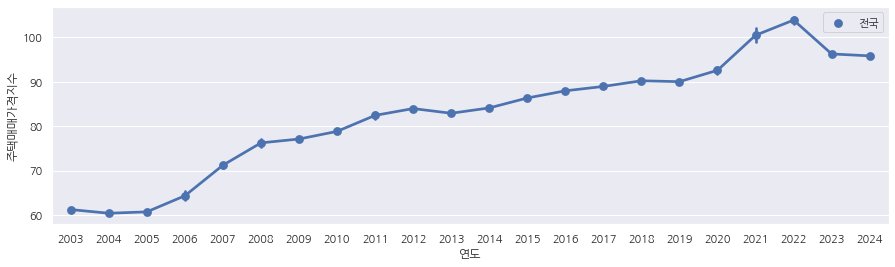

In [36]:
# 그래프 사이즈 변경하기 (가로, 세로)
plt.figure(figsize=(15, 4))

#  hue 인수에 카테고리 변수 이름을 지정하면, 카테고리 값에 따라 색상 변경
sns.pointplot(data=df_nation, x="연도", y="주택매매가격지수", hue="지역")

# 레전드 "* 전국" 위치를 고정
plt.legend(bbox_to_anchor=(1, 1))

In [37]:
df_seoul = df[df["지역"].isin(["전국", "서울특별시"])]
df_seoul.head()

,지역,기간,주택매매가격지수,연도,월
0,전국,2003.11,61.5,2003,11
1,서울특별시,2003.11,55.6,2003,11
18,전국,2003.12,61.0,2003,12
19,서울특별시,2003.12,55.2,2003,12
36,전국,2004.01,60.7,2004,01


In [38]:
df_pusan = df[df["지역"].isin(["전국", "서울특별시",'부산광역시'])]
df_pusan.head()

,지역,기간,주택매매가격지수,연도,월
0,전국,2003.11,61.5,2003,11
1,서울특별시,2003.11,55.6,2003,11
2,부산광역시,2003.11,66.4,2003,11
18,전국,2003.12,61.0,2003,12
19,서울특별시,2003.12,55.2,2003,12


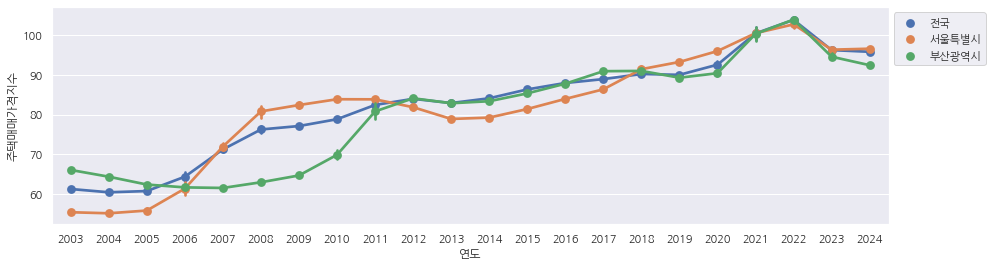

In [39]:
# 그래프 사이즈 변경하기 (가로, 세로)
plt.figure(figsize=(15, 4))

#  hue 인수에 카테고리 변수 이름을 지정하면, 카테고리 값에 따라 색상 변경
sns.pointplot(data=df_pusan, x="연도", y="주택매매가격지수", hue="지역")

# 레전드 "* 전국" 위치를 고정
plt.legend(bbox_to_anchor=(1, 1))

# 그래프를 파일로 저장
plt.savefig('./data/주택매매가격지수 시각화.png') # pad_inches=0

# 연습문제(Exercise) - Just Do It Now !
### isin()함수를 사용하여 전국과 여러분이 사는 지역의 주택매매가격지수를 비교해보세요

In [40]:
## 코드입력

# 정부별 주택매매지수 시계열 분석

In [41]:
df_nation

,지역,기간,주택매매가격지수,연도,월
0,전국,2003.11,61.5,2003,11
18,전국,2003.12,61.0,2003,12
36,전국,2004.01,60.7,2004,01
54,전국,2004.02,60.7,2004,02
72,전국,2004.03,60.8,2004,03
...,...,...,...,...,...
4356,전국,2024.01,96.0,2024,01
4374,전국,2024.02,95.9,2024,02
4392,전국,2024.03,95.8,2024,03
4410,전국,2024.04,95.7,2024,04


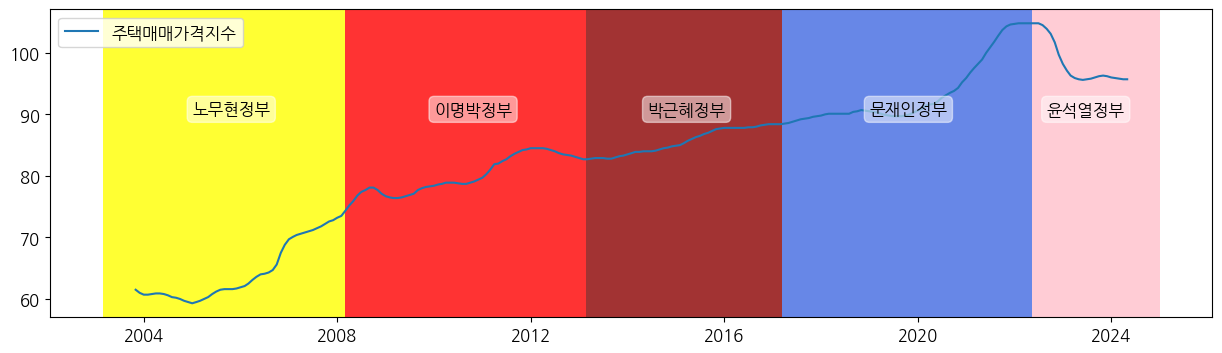

In [42]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# 1. 기본 스타일 설정
plt.style.use('default')
plt.rcParams['figure.figsize'] = (15, 4)

plt.rcParams['font.size'] = 12
# plt.rc('font', size = 12)

plt.rcParams['font.family'] ='NanumGothic'
# plt.rc('font', family = 'NanumGothic')



# 시점 
df_nation['기간'] = pd.to_datetime(df_nation['기간'])

plt.plot(df_nation['기간'], df_nation['주택매매가격지수'], label='주택매매가격지수')

# 구간별 색상변경
plt.axvspan(datetime(2003, 2, 25), datetime(2008, 2, 25), facecolor='yellow', alpha=0.8)
plt.axvspan(datetime(2008, 2, 25), datetime(2013, 2, 25), facecolor='red', alpha=0.8)
plt.axvspan(datetime(2013, 2, 25), datetime(2017, 3, 10), facecolor='darkred', alpha=0.8)
plt.axvspan(datetime(2017, 3, 10), datetime(2022, 5, 10), facecolor='royalblue', alpha=0.8)
plt.axvspan(datetime(2022, 5, 10), datetime(2024, 12, 31), facecolor='pink', alpha=0.8)



# 구간별 텍스트
mybox={'facecolor':'w','edgecolor':'w','boxstyle':'round','alpha':0.5}
plt.text(datetime(2005, 1, 1),90,'노무현정부', bbox=mybox)
plt.text(datetime(2010, 1, 1),90,'이명박정부', bbox=mybox)
plt.text(datetime(2014, 6, 1),90,'박근혜정부', bbox=mybox)
plt.text(datetime(2019, 1, 1),90,'문재인정부', bbox=mybox)
plt.text(datetime(2022, 9, 1),90,'윤석열정부', bbox=mybox)


# ax=plt.gca() #현재 축의 객체를 반환
# ax.get_xaxis().set_visible(False)

plt.savefig('./data/graph.png', pad_inches=0) # bbox_inches='tight
plt.legend()

plt.show()

# 그래프를 파일로 저장

# 연습문제(Exercise) - Just Do It Now !
### 위의 코드를 사용하여 정부별 전국과 여러분이 사는 지역의 주택매매가격지수 시각화해보세요

In [43]:
df_temp = df[df["지역"].isin(["전국", "서울특별시"])]
df_temp['기간'] = pd.to_datetime(df_temp['기간'])
df_temp

,지역,기간,주택매매가격지수,연도,월
0,전국,2003-11-01,61.5,2003,11
1,서울특별시,2003-11-01,55.6,2003,11
18,전국,2003-12-01,61.0,2003,12
19,서울특별시,2003-12-01,55.2,2003,12
36,전국,2004-01-01,60.7,2004,01
...,...,...,...,...,...
4393,서울특별시,2024-03-01,96.5,2024,03
4410,전국,2024-04-01,95.7,2024,04
4411,서울특별시,2024-04-01,96.6,2024,04
4428,전국,2024-05-01,95.7,2024,05


In [44]:
df_seoul = df_temp[df_temp['지역']=="서울특별시"]
df_nation = df_temp[df_temp['지역']=="전국"]

In [45]:
df_seoul

,지역,기간,주택매매가격지수,연도,월
1,서울특별시,2003-11-01,55.6,2003,11
19,서울특별시,2003-12-01,55.2,2003,12
37,서울특별시,2004-01-01,55.1,2004,01
55,서울특별시,2004-02-01,55.3,2004,02
73,서울특별시,2004-03-01,55.5,2004,03
...,...,...,...,...,...
4357,서울특별시,2024-01-01,96.6,2024,01
4375,서울특별시,2024-02-01,96.5,2024,02
4393,서울특별시,2024-03-01,96.5,2024,03
4411,서울특별시,2024-04-01,96.6,2024,04


In [46]:
df_nation

,지역,기간,주택매매가격지수,연도,월
0,전국,2003-11-01,61.5,2003,11
18,전국,2003-12-01,61.0,2003,12
36,전국,2004-01-01,60.7,2004,01
54,전국,2004-02-01,60.7,2004,02
72,전국,2004-03-01,60.8,2004,03
...,...,...,...,...,...
4356,전국,2024-01-01,96.0,2024,01
4374,전국,2024-02-01,95.9,2024,02
4392,전국,2024-03-01,95.8,2024,03
4410,전국,2024-04-01,95.7,2024,04


In [47]:
# 0. 데이터 설정
from datetime import datetime

df_temp = df[df["지역"].isin(["전국", "서울특별시"])]
df_temp['기간'] = pd.to_datetime(df_temp['기간'])

df_seoul = df_temp[df_temp['지역']=="서울특별시"]
df_nation = df_temp[df_temp['지역']=="전국"]

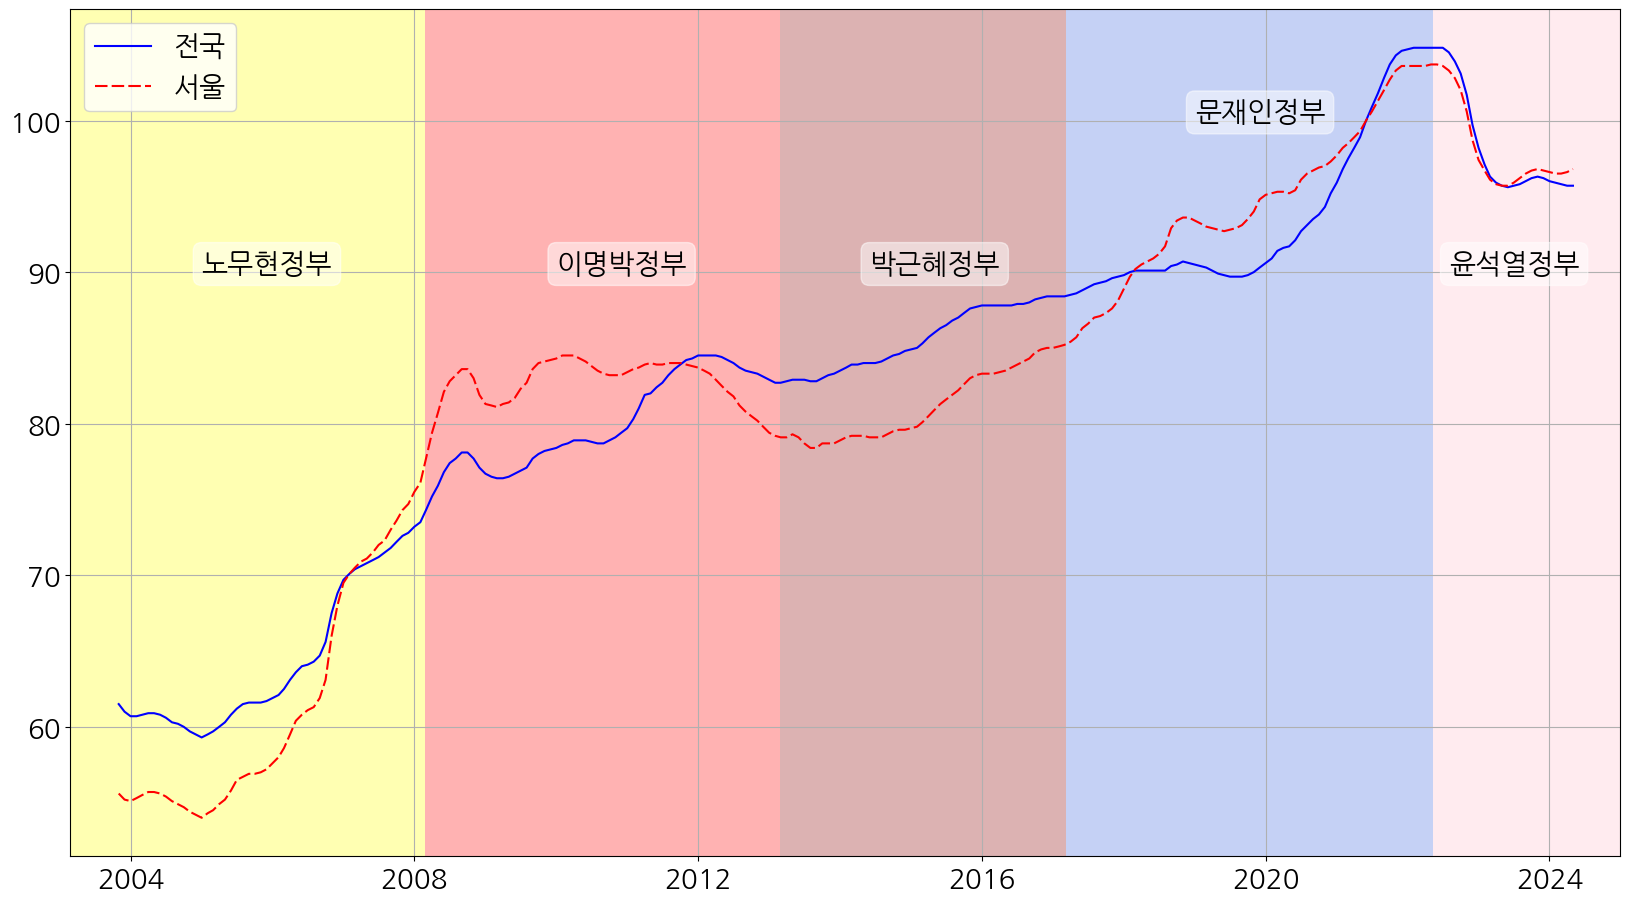

In [48]:
import matplotlib.pyplot as plt
from datetime import datetime

# 1. 기본 스타일 설정
plt.style.use('default')
plt.rcParams['figure.figsize'] = (20, 11)
plt.rc('font', family = 'NanumGothic')
plt.rcParams['font.size'] = 20

x = df_seoul['기간']
y1 = df_nation['주택매매가격지수']
y2 = df_seoul['주택매매가격지수']

fig, ax = plt.subplots()

line1, = ax.plot(x, y1, label='전국', color='blue')
line2, = ax.plot(x, y2, dashes=[6, 2], label='서울', color='red')


# 구간별 색상변경
plt.axvspan(datetime(2003, 2, 25), datetime(2008, 2, 25), facecolor='yellow', alpha=0.3)
plt.axvspan(datetime(2008, 2, 25), datetime(2013, 2, 24), facecolor='red', alpha=0.3)
plt.axvspan(datetime(2013, 2, 25), datetime(2017, 3, 10), facecolor='darkred', alpha=0.3)
plt.axvspan(datetime(2017, 3, 10), datetime(2022, 5, 9), facecolor='royalblue', alpha=0.3)
plt.axvspan(datetime(2022, 5, 10), datetime(2024, 12, 31), facecolor='pink', alpha=0.3)


# 구간별 텍스트
mybox={'facecolor':'w','edgecolor':'w','boxstyle':'round','alpha':0.5}
plt.text(datetime(2005, 1, 1),90,'노무현정부', bbox=mybox)
plt.text(datetime(2010, 1, 1),90,'이명박정부', bbox=mybox)
plt.text(datetime(2014, 6, 1),90,'박근혜정부', bbox=mybox)
plt.text(datetime(2019, 1, 1),100,'문재인정부', bbox=mybox)
plt.text(datetime(2022, 8, 1),90,'윤석열정부', bbox=mybox)

ax.margins(x=0)
ax.grid()
ax.legend()
plt.show()

#### <span style="color:red"> ※ 정치적인 시각에서 보시지 마시고, 데이터 분석 시각에서 봐주시기 바랍니다.</span>

# 6. groupby 함수
  df.groupby(["가로(행 row)", "세로(열 column)"]
  df.groupby(["지역", "연도"])  
  이해가 안될 때 : 3. Data Aggregation and Group Operation_master.ipynb

## 6.1 background_gradient()  

[판다스 공식 Document](https://docs.w3cub.com/pandas~0.25/reference/api/pandas.io.formats.style.styler.background_gradient)

In [49]:
df

,지역,기간,주택매매가격지수,연도,월
0,전국,2003.11,61.5,2003,11
1,서울특별시,2003.11,55.6,2003,11
2,부산광역시,2003.11,66.4,2003,11
3,대구광역시,2003.11,58.2,2003,11
4,인천광역시,2003.11,55.9,2003,11
...,...,...,...,...,...
4441,전라북도,2024.05,101.3,2024,05
4442,전라남도,2024.05,98.7,2024,05
4443,경상북도,2024.05,100.8,2024,05
4444,경상남도,2024.05,96.8,2024,05


In [50]:
df.groupby(["연도","지역"])["주택매매가격지수"].mean()

연도    지역     
2003  강원특별자치도     73.40
      경기도         56.20
      경상남도        70.05
      경상북도        77.75
      광주광역시       61.70
                  ...  
2024  전라남도        98.70
      전라북도       101.24
      제주특별자치도    101.08
      충청남도        99.54
      충청북도       102.02
Name: 주택매매가격지수, Length: 396, dtype: float64

In [51]:
table = df.groupby(["연도","지역"])["주택매매가격지수"].mean().unstack()
table

지역,강원특별자치도,경기도,경상남도,경상북도,광주광역시,대구광역시,대전광역시,부산광역시,서울특별시,세종특별자치시,울산광역시,인천광역시,전국,전라남도,전라북도,제주특별자치도,충청남도,충청북도
연도,,,,,,,,,,,,,,,,,,
2003,73.400000,56.200000,70.050000,77.750000,61.700000,57.850000,59.150000,66.050000,55.400000,NaN,56.500000,55.650000,61.250000,70.050000,70.150000,99.850000,79.700000,68.750000
2004,74.791667,55.150000,70.183333,76.275000,61.658333,56.775000,59.691667,64.350000,55.133333,NaN,56.691667,54.291667,60.425000,68.400000,69.850000,87.100000,79.575000,68.658333
2005,77.116667,55.550000,70.891667,76.716667,64.125000,58.325000,59.683333,62.375000,55.825000,NaN,58.983333,52.625000,60.733333,67.391667,69.966667,80.666667,80.566667,70.816667
2006,79.191667,61.425000,71.883333,80.166667,66.608333,61.291667,59.366667,61.658333,61.358333,NaN,64.983333,54.583333,64.350000,66.816667,72.266667,77.716667,81.100000,74.708333
2007,78.325000,74.666667,72.375000,83.375000,67.466667,61.133333,58.483333,61.516667,71.958333,NaN,73.733333,64.933333,71.225000,68.600000,73.725000,75.783333,81.341667,75.050000
2008,77.833333,80.766667,74.066667,84.216667,68.300000,60.483333,58.758333,62.950000,80.800000,NaN,75.925000,80.233333,76.250000,74.991667,77.308333,74.958333,81.966667,76.150000
2009,78.650000,80.200000,75.408333,82.341667,68.083333,58.533333,59.900000,64.666667,82.408333,NaN,76.100000,85.941667,77.116667,77.550000,79.675000,74.783333,82.500000,76.316667
2010,80.225000,79.900000,80.033333,82.441667,68.441667,59.183333,64.241667,69.866667,83.866667,NaN,79.033333,86.025000,78.833333,80.416667,84.383333,78.008333,83.116667,78.991667
2011,85.666667,79.925000,96.241667,85.200000,75.633333,62.516667,71.716667,80.800000,83.841667,NaN,85.141667,84.858333,82.433333,85.000000,92.441667,81.866667,86.550000,87.175000


## 2주차 과제(미리 풀어보기)

# 2024년 데이터

In [52]:
import pandas as pd

# 데이터 불러오기

sales_index= pd.read_csv("./data/아파트매매가격지수_시도_시_군_구__20240712233237.csv", encoding="cp949", skiprows=1, names=['시점', '매매'])
rent_index = pd.read_csv("./data/아파트전세가격지수_시도_시_군_구__20240712233244.csv", encoding="cp949", skiprows=1, names=['시점', '전세'])

In [53]:
sales_index

,시점,매매
0,2003.11,55.4
1,2003.12,55.1
2,2004.01,55.0
3,2004.02,55.1
4,2004.03,55.4
...,...,...
242,2024.01,93.2
243,2024.02,93.0
244,2024.03,92.9
245,2024.04,92.8


In [54]:
rent_index

,시점,전세
0,2003.11,49.7
1,2003.12,49.2
2,2004.01,49.1
3,2004.02,49.3
4,2004.03,49.6
...,...,...
242,2024.01,88.8
243,2024.02,88.8
244,2024.03,88.9
245,2024.04,89.0


In [55]:
# 연도와 월 정보 추출

rent_index['연도']= rent_index['시점'].astype(str).str.split('.', expand=True)[0]
rent_index['월']= rent_index['시점'].astype(str).str.split('.', expand=True)[1]

sales_index['연도']= sales_index['시점'].astype(str).str.split('.', expand=True)[0]
sales_index['월']= sales_index['시점'].astype(str).str.split('.', expand=True)[1]

In [56]:
rent_index['월'].head(12)

0     11
1     12
2     01
3     02
4     03
5     04
6     05
7     06
8     07
9     08
10    09
11     1
Name: 월, dtype: object

In [57]:
# 월표기 오류부분 정정

rent_index['월'] = rent_index['월'].replace("1", "10")
sales_index['월'] = sales_index['월'].replace("1", "10")

In [58]:
# 시점을 수정된 날짜로 재조정

rent_index['시점'] = rent_index['연도'] + "-" + rent_index['월']
sales_index['시점'] = sales_index['연도'] + "-" + rent_index['월']

In [59]:
rent_index.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시점      247 non-null    object 
 1   전세      247 non-null    float64
 2   연도      247 non-null    object 
 3   월       247 non-null    object 
dtypes: float64(1), object(3)
memory usage: 7.8+ KB


In [60]:
# 데이터 타입 변경 (문자열 -> 날짜)

rent_index['시점'] = pd.to_datetime(rent_index['시점'])
sales_index['시점'] = pd.to_datetime(sales_index['시점'])

In [61]:
# 전세 데이터 와 매매 데이터를 병합

df_merged = pd.merge_asof(
    rent_index, sales_index,
    on='시점', direction='nearest')

In [62]:
df_merged

,시점,전세,연도_x,월_x,매매,연도_y,월_y
0,2003-11-01,49.7,2003,11,55.4,2003,11
1,2003-12-01,49.2,2003,12,55.1,2003,12
2,2004-01-01,49.1,2004,01,55.0,2004,01
3,2004-02-01,49.3,2004,02,55.1,2004,02
4,2004-03-01,49.6,2004,03,55.4,2004,03
...,...,...,...,...,...,...,...
242,2024-01-01,88.8,2024,01,93.2,2024,01
243,2024-02-01,88.8,2024,02,93.0,2024,02
244,2024-03-01,88.9,2024,03,92.9,2024,03
245,2024-04-01,89.0,2024,04,92.8,2024,04


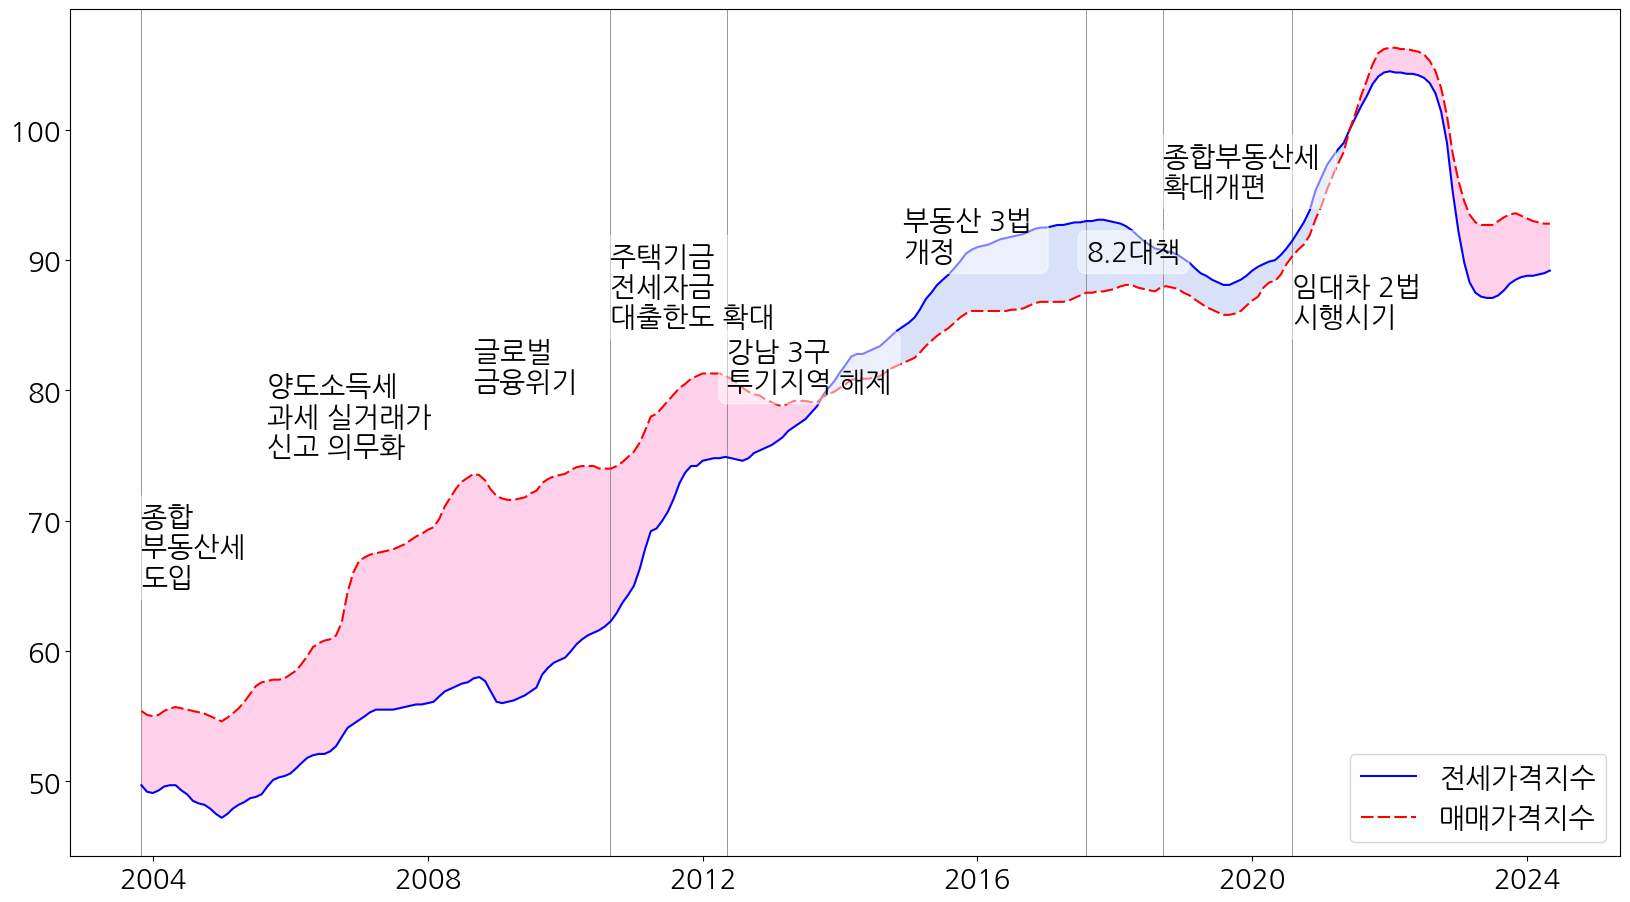

In [63]:
import matplotlib.pyplot as plt
from datetime import datetime

# 1. 기본 스타일 설정
plt.style.use('default')
plt.rcParams['figure.figsize'] = (20, 11)
plt.rc('font', family = 'NanumGothic')
plt.rcParams['font.size'] = 20

x = df_merged['시점']
y1 = df_merged['전세']
y2 = df_merged['매매']

fig, ax = plt.subplots()


line1, = ax.plot(x, y1, label='전세가격지수', color='blue')
line2, = ax.plot(x, y2, dashes=[6, 2], label='매매가격지수', color='red')

# 낮으면 파란색, 높으면 빨간색을 채우기
plt.fill_between(x, y1, y2, where = y1 >= y2, facecolor='royalblue', alpha=0.2)
plt.fill_between(x, y1, y2, where = y1 < y2, facecolor='deeppink', alpha=0.2)

# 세로 영역표시
plt.axvspan(datetime(2003,10,29),datetime(2003,11,3),facecolor = "grey",alpha = 0.8)
plt.axvspan(datetime(2005,8,31),datetime(2005,9,1),facecolor = "grey",alpha = 0.8)
plt.axvspan(datetime(2008,9,1),datetime(2008,9,5),facecolor = "grey",alpha = 0.8)
plt.axvspan(datetime(2010,8,29),datetime(2010,9,2),facecolor = "grey",alpha = 0.8)
plt.axvspan(datetime(2012,5,10),datetime(2012,5,13),facecolor = "grey",alpha = 0.8)
plt.axvspan(datetime(2014,12,1),datetime(2014,12,4),facecolor = "grey",alpha = 0.8)
plt.axvspan(datetime(2017,8,2),datetime(2017,8,5),facecolor = "grey",alpha = 0.8) # 8.2 대책
plt.axvspan(datetime(2018,9,13),datetime(2018,9,17),facecolor = "grey",alpha = 0.8)
plt.axvspan(datetime(2020,7,31),datetime(2020,8,7),facecolor = "grey",alpha = 0.8) # 임대차 2법 시행

# 구간별 텍스트
mybox={'facecolor':'w','edgecolor':'w','boxstyle':'round','alpha':0.5}
plt.text(datetime(2003,10,29),65,'종합 \n부동산세 \n도입',bbox = mybox)
plt.text(datetime(2005,8,31),75,'양도소득세 \n과세 실거래가 \n신고 의무화',bbox = mybox)
plt.text(datetime(2008,9,1),80,'글로벌 \n금융위기',bbox = mybox)
plt.text(datetime(2010,8,29),85,'주택기금 \n전세자금 \n대출한도 확대',bbox = mybox)
plt.text(datetime(2012,5,10),80,'강남 3구 \n투기지역 해제',bbox = mybox)
plt.text(datetime(2014,12,1),90,'부동산 3법 \n개정',bbox = mybox)
plt.text(datetime(2017,8,2),90,'8.2대책',bbox = mybox)
plt.text(datetime(2018,9,13),95,'종합부동산세 \n확대개편',bbox = mybox)
plt.text(datetime(2020,7,31),85,'임대차 2법 \n시행시기',bbox = mybox)

ax.legend()
plt.show()

In [64]:
line1

In [65]:
line2

In [66]:
# # Additional Lecture <그래프 그리기>

<img src="./data/anatomy.png" width="500" height="300">

In [67]:
import matplotlib.pyplot as plt

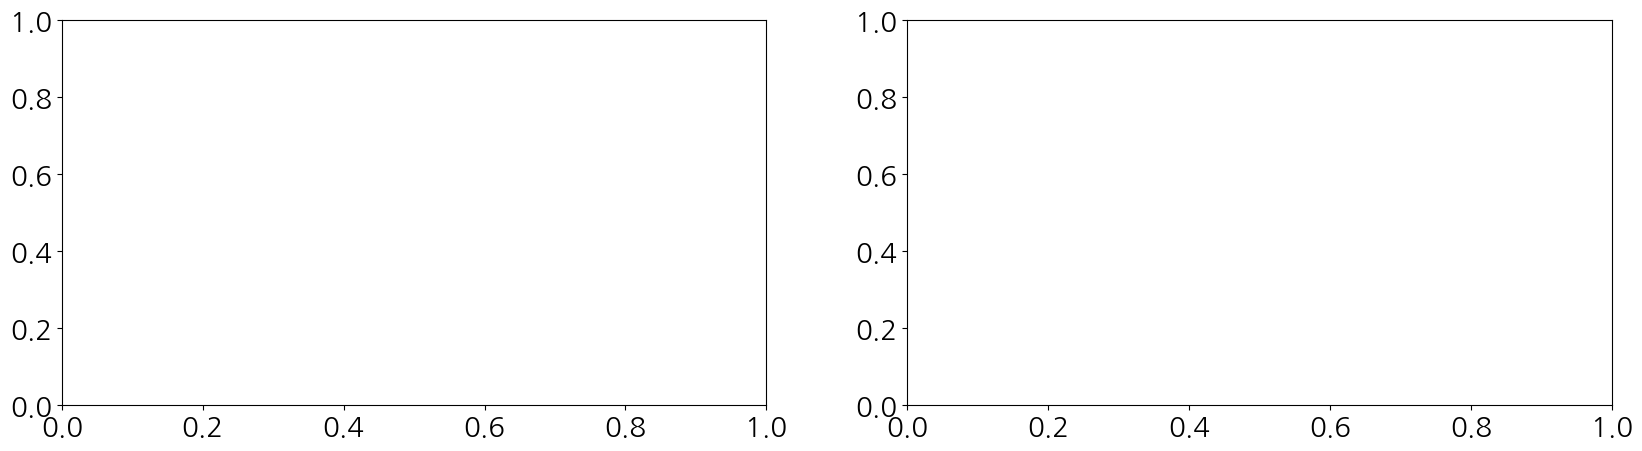

In [68]:
# subplot의 예
# fig, ax = plt.subplots()


plt.subplot(2,2,1)
plt.subplot(2,2,2)

plt.show()

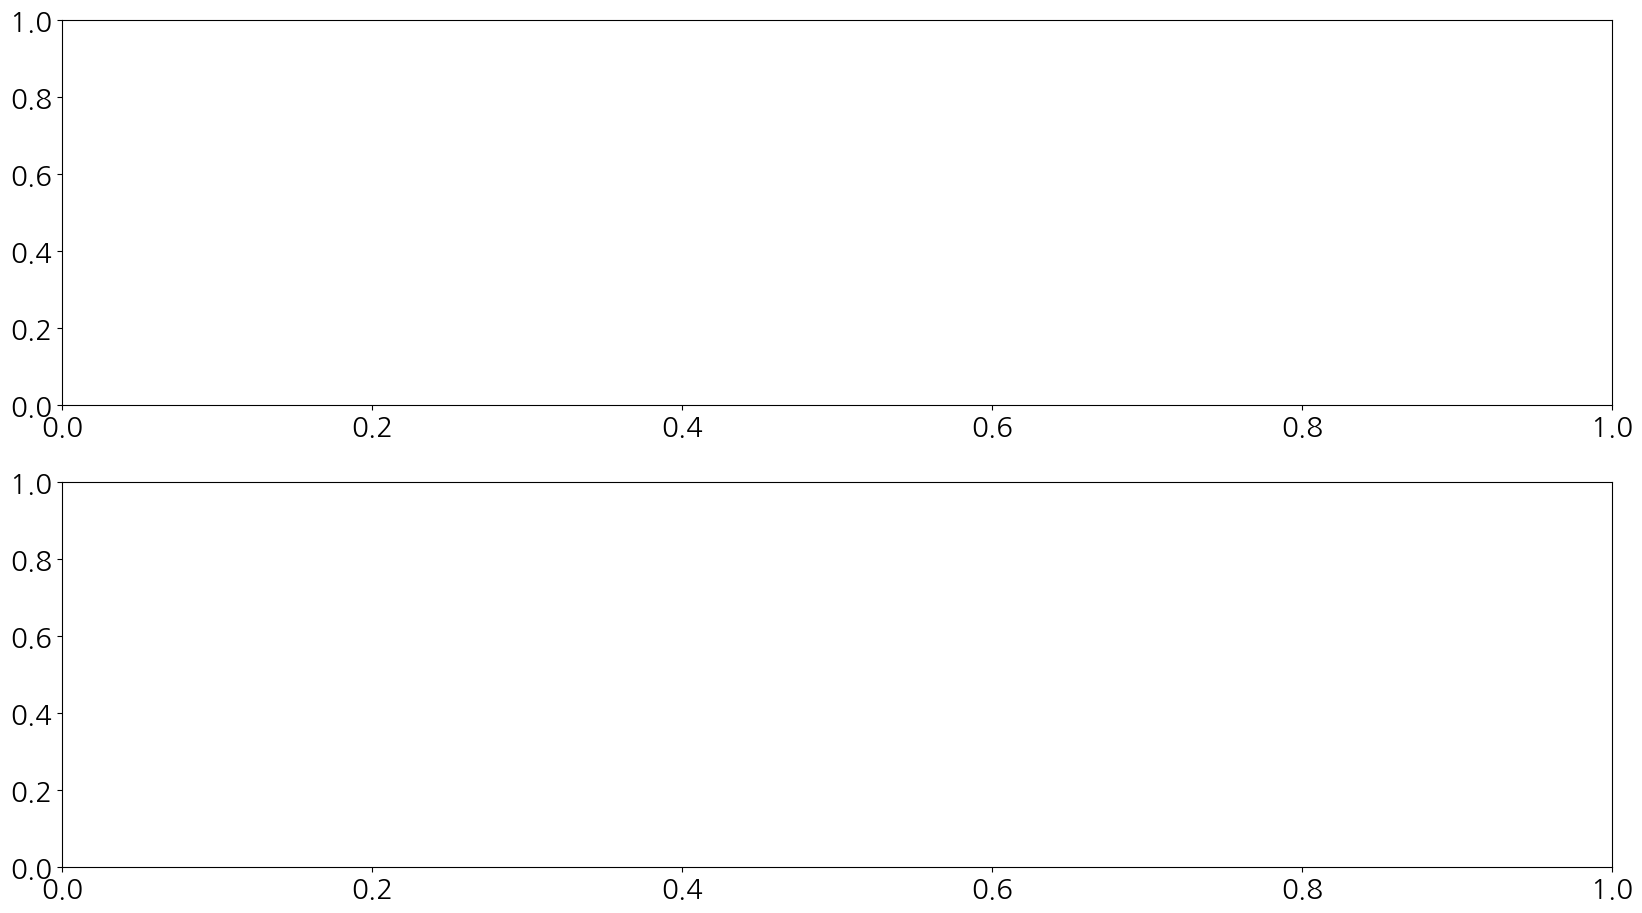

In [69]:
# subplots의 예
fig, axes = plt.subplots(nrows=2, ncols=1)
plt.show()

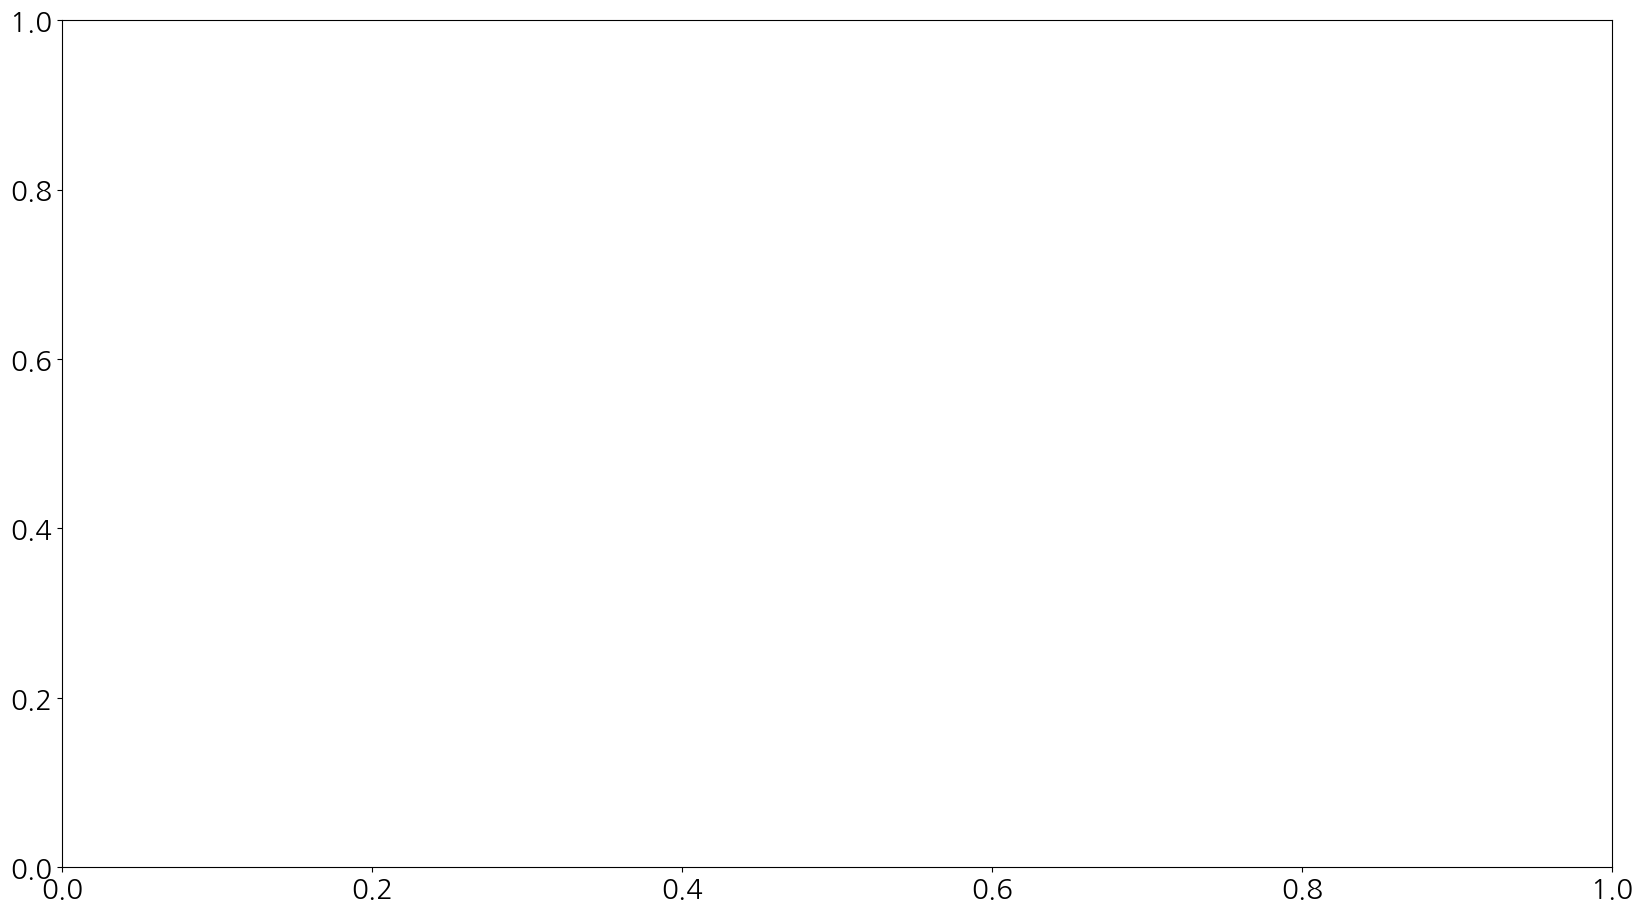

In [70]:
fig, axes = plt.subplots()

In [71]:
# import matplotlib.pyplot as plt

# # figure 크기 설정
# plt.figure(figsize=(15,7))

# # grid 설정
# plt.grid(True)

# # title 설정
# plt.title()

# # x, y축 라벨 설정
# plt.xlabel()
# plt.ylabel()

# # x, y축 범위 설정
# plt.xlim()
# plt.xlim()

# # x, y축 눈금 설정
# plt.xticks()
# plt.yticks()

# # 범례
# plt.legend()

# # 그리기
# plt.plot()

# # 보이기
# plt.show()</div><i class="fa fa-lightbulb-o "></i>

In [72]:
print(fig)
print(axes)

Figure(2000x1100)
AxesSubplot(0.125,0.11;0.775x0.77)


AxesSubplot(0.125,0.53;0.775x0.35)


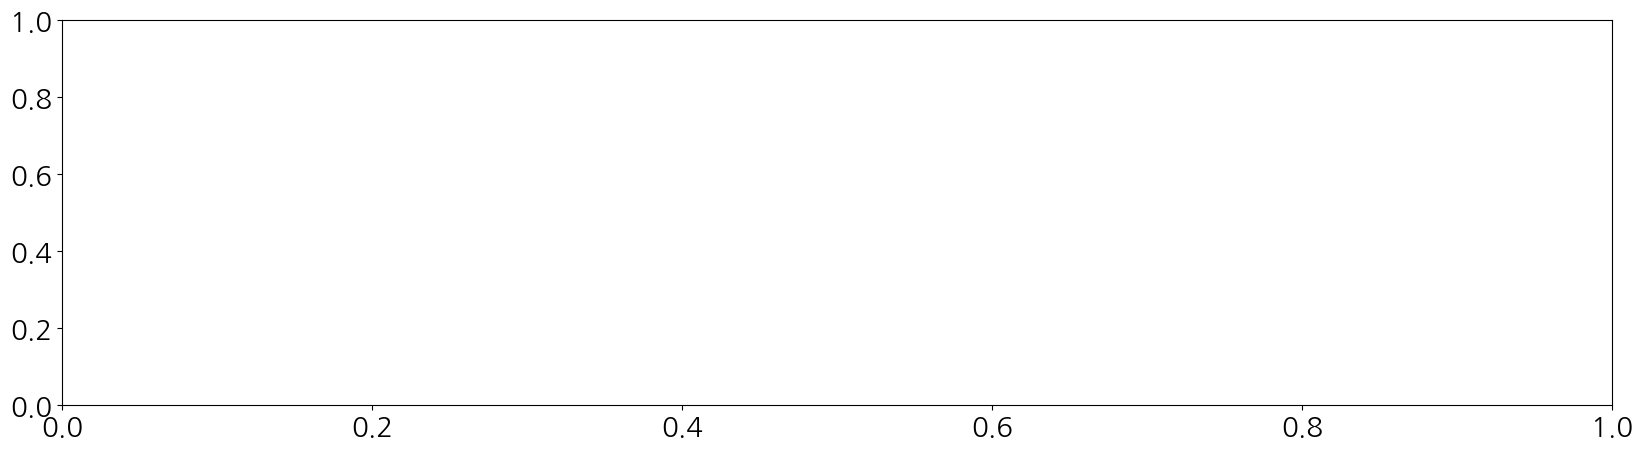

In [73]:
ax = plt.subplot(2,1,1) #subplot은 하나의 값(axes)만 받을 수 있습니다.

# print(fig)
print(ax)